# 이미지 분류(숫자)

In [1]:
import numpy as np
from sklearn.model_selection import KFold
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
x_train=x_train.reshape((x_train.shape[0],28*28)).astype('float32')/255  #float32가 최대수255인데 255로 나눠서 0~1로 정규화됨
x_test=x_test.reshape((x_test.shape[0],28*28)).astype('float32')/255

In [5]:
x_test.shape   #28*28해서 784나옴 독립변수 수

(10000, 784)

In [6]:
# K-Fold 설정
k = 5
kf = KFold(n_splits=k)

# 교차 검증 수행
fold_no = 1
for train_index, val_index in kf.split(x_train):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # 모델 생성
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # 모델 학습
    print(f'Training for fold {fold_no} ...')
    model.fit(x_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(x_val_fold, y_val_fold))

    # 검증 성능 평가
    val_loss, val_accuracy = model.evaluate(x_val_fold, y_val_fold)
    print(f'Fold {fold_no} - Validation accuracy: {val_accuracy:.4f}')

    fold_no += 1

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training for fold 1 ...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8637 - loss: 0.4741 - val_accuracy: 0.9538 - val_loss: 0.1528
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9599 - loss: 0.1373 - val_accuracy: 0.9640 - val_loss: 0.1200
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9743 - loss: 0.0835 - val_accuracy: 0.9663 - val_loss: 0.1084
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9818 - loss: 0.0607 - val_accuracy: 0.9724 - val_loss: 0.0949
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9860 - loss: 0.0470 - val_accuracy: 0.9738 - val_loss: 0.0873
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9892 - loss: 0.0373 - val_accuracy: 0.9772 - val_loss: 0.0781
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9920 - loss: 0.0284 - val_accuracy: 0.9739 - val_loss: 0.0943
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


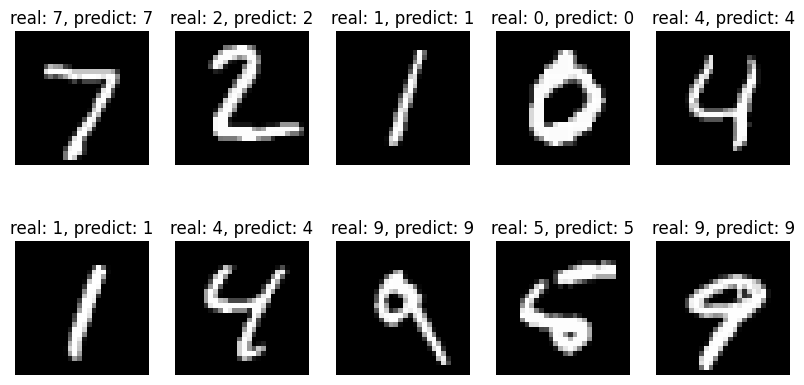

In [7]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import numpy as np

# 예측 결과 생성
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# 10개 이미지 출력
plt.figure(figsize=(10, 5))
for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'real: {y_test[i]}, predict: {predicted_labels[i]}')
    plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Result: 4


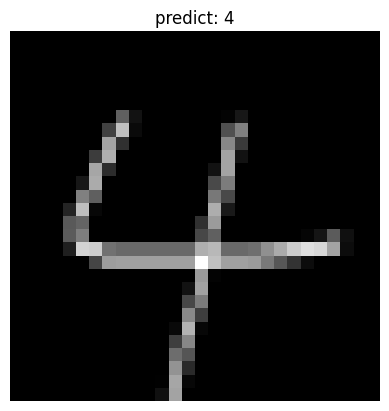

In [9]:
#숫자 예측
from PIL import Image, ImageOps

# 이미지 불러오기
image_path = 'numberimage.png'  # 사용자 입력 이미지 경로
img = Image.open(image_path).convert('L')  # 흑백 이미지로 변환

# 이미지 크기 조정 및 정규화
img = img.resize((28, 28))
img = ImageOps.invert(img)  # 숫자를 흰색으로, 배경을 검은색으로 반전
img_array = np.array(img).astype('float32') / 255.0
img_array = img_array.reshape(1, 28 * 28)  # 모델 입력 형태에 맞게 변환

# 모델 예측
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

# 결과 출력
print(f'Result: {predicted_label}')
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'predict: {predicted_label}')
plt.axis('off')
plt.show()